In [1]:
from game_simulation import GameOutcome #imports the simulated game that I built. See Github for details on how it was built
import matplotlib.pyplot as plt

Disclaimer: For research use only, does not guarantee any outcomes or strategy on blackjack

In [2]:
blackjack = GameOutcome()

In [3]:
def run_simulation(betting, hold):
    """
    Run the blackjack simulation 1000 times on a certain bet and holding amount. 
    Returns a list of the final amount of the game.
    """
    final_amount = []
    number_of_bets = []

    for i in range(1000):
        bid_numbers = 0
        blackjack.AddFunds(1000)
        for j in range(1000):
            blackjack.Betting(betting, hold)
            bid_numbers += 1
            if blackjack.amount <= 0:
                break
        final_amount.append(blackjack.amount)
        number_of_bets.append(bid_numbers)
    
    return final_amount, number_of_bets

In [4]:
def distribute_outcomes(bet, hold, plot=True):
    """
    Get the distribution of 1000 versions of the run_simulation function. 
    Output is a list of the final amounts.
    """
    test1, test2 = run_simulation(bet, hold)
    bet_amount = 1000
    outcome = []
    filename = "outcome_with_{number}_limit.png".format(number=hold)
    for i in test1:
        diff = i - bet_amount
        outcome.append(diff)
    if plot is True:
        plt.figure(figsize=(15,10))
        plt.hist(outcome)
        plt.title("Distribution of outcome for 1m blackjack games, betting {a} holding at {b}".format(a=bet, b=hold))
    else:
        return outcome

In [5]:
def double_down_loop(bid, amount, hands_played):
    total_plays = []
    for i in range(hands_played):
        length_of_play = 0
        blackjack.AddFunds(1000)
        for i in range(hands_played):
            blackjack.double_down(bid, amount)
            length_of_play += 1
            if blackjack.amount <= 0:
                break
        total_plays.append(length_of_play)
    plt.figure(figsize=(15,10))
    plt.hist(total_plays,bins=100)

    plt.show()
    

## Overview

This analysis is to see what blackjack strategy, overtime, would be the most optimal for returns. For the purpose of this analysis we will only look at strategy of the value to hold at and bidding since card counting is futile. 

This will answer 3 questions:

* If you were to play 1000 hands of blackjack 1000 times what would the distribution of outcomes based on holding.
* Does bidding strategy matter
* If you attmepted to play a double down only strategy (everytime you lose you double your bid until you win) how many hands could you play until you went bust? 



### Methodology

To analyze these outcomes I recreated a simple version of Blackjack to calculate the outcome of one bet. The simulation focuses on some simple blackjack rules:

- Ace is valued at 11 unless >10, then its 1
- The dealer holds at 17
- Cards are drawn until the value is greater or equal to the hold amount
- The game is a simple bet where winning gives returns the user double and losing subtracts it from the pot. 



I used this base to  run a simulation on 1000 hands, with a starting amount of $1000. The main metric I wanted for an output is the net difference, which is: 

Final amount - $1000

If the player loases all of their money, the game stops and final amount is equal to 0..

As a follow up analysis I also included capabilities to look into doubling down, namely the strategy on doubling your bet until you win a hand. As you likely will end up with 0 after 1000 hands, my aim would be to see how many hands a player could play until they went bust. 



### Question 1: Does bidding strategy matter?

To answer this lets just run the above simulation holding at 16 changing only the bids. 

If it was the case that bidding strategy matters then we should see a significant variance in the distribution of betting outcomes.


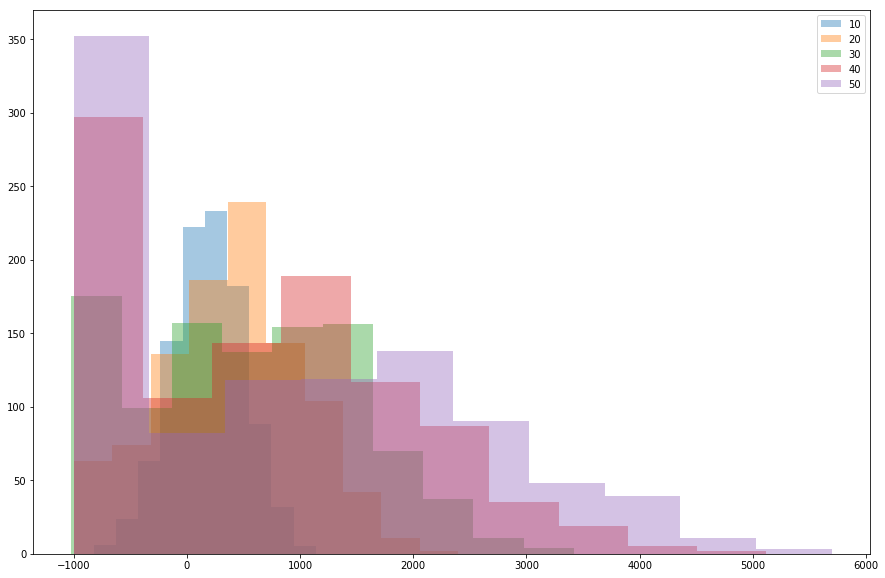

In [71]:
plt.figure(figsize=(15,10))
for i in [10,20,30,40,50]:
    plt.hist(distribute_outcomes(i, 16, False), alpha=0.4)
plt.legend(['10', '20','30','40','50'])

Apart from long tails emerging in the higher bids the outcome should be relatively similar. Lets repeat above with only the bids from 10 - 30

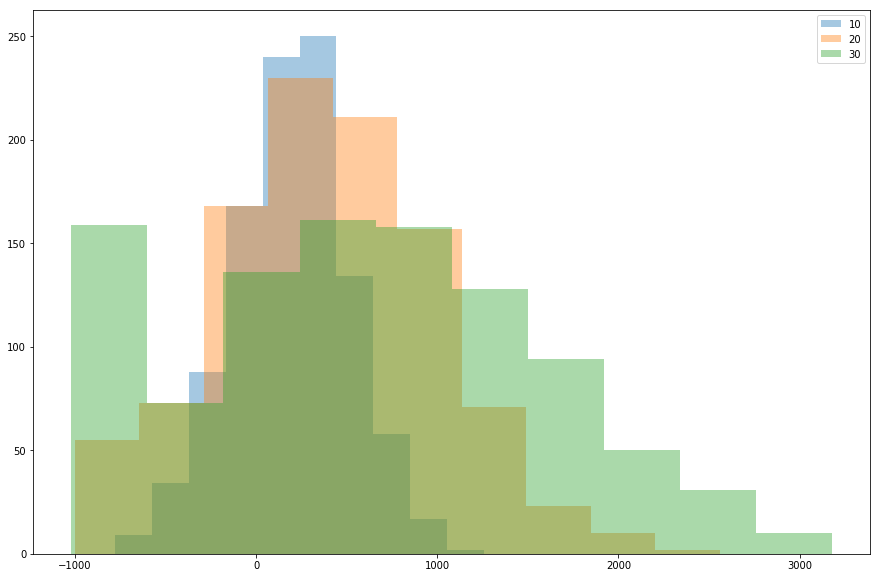

In [73]:
plt.figure(figsize=(15,10))
for i in [10,20,30]:
    plt.hist(distribute_outcomes(i, 16, False), alpha=0.4)
plt.legend(['10', '20','30'])

**Conclusion**: There is no significant difference or advantage in using bidding as a strategic bet to win an outcome. The distribution gets larger based on the bet amount, but the hsitogram peaks don't significantly shift. 

## Holding

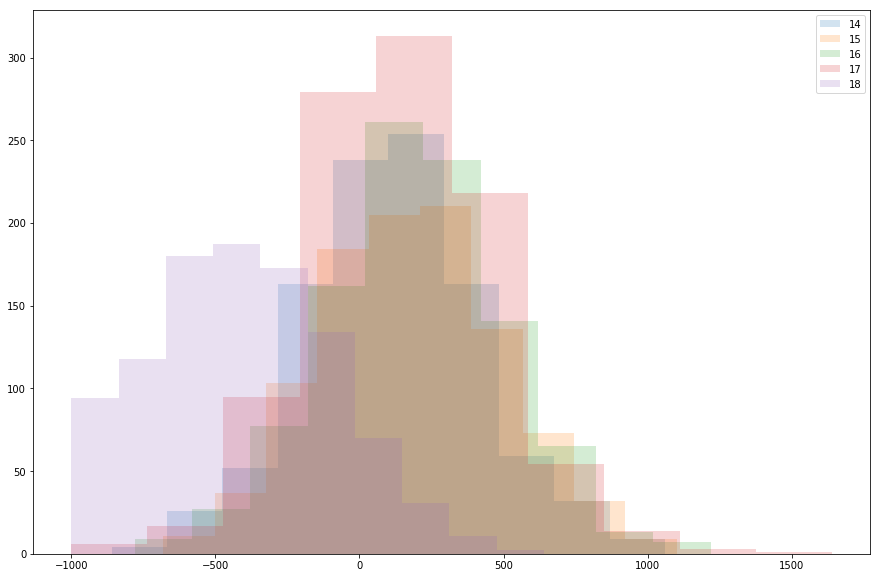

In [75]:
plt.figure(figsize=(15,10))
for i in [14,15,16,17,18]:
    plt.hist(distribute_outcomes(10, i, False), alpha=0.2)
plt.legend(['14','15','16','17','18'])

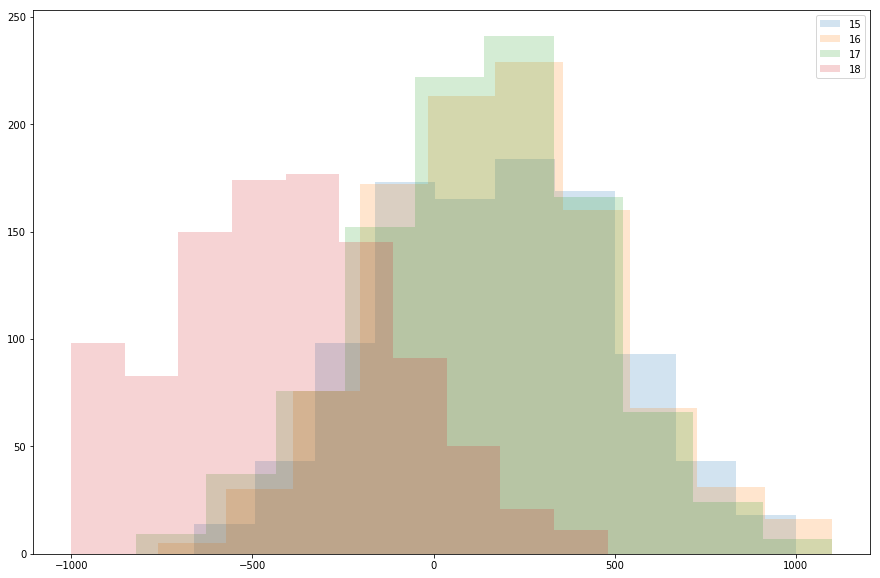

In [76]:
plt.figure(figsize=(15,10))
for i in [15,16,17,18]:
    plt.hist(distribute_outcomes(10, i, False), alpha=0.2)
plt.legend(['15','16','17','18'])

So, holding on 15,16,17 appears to give you the best return in overtime. Now lets break this out into three distinct charts to see if there is one hand that could have a better outcome against the others. 

Looking at them combined shows no significant change, but the coloring could skewer this.

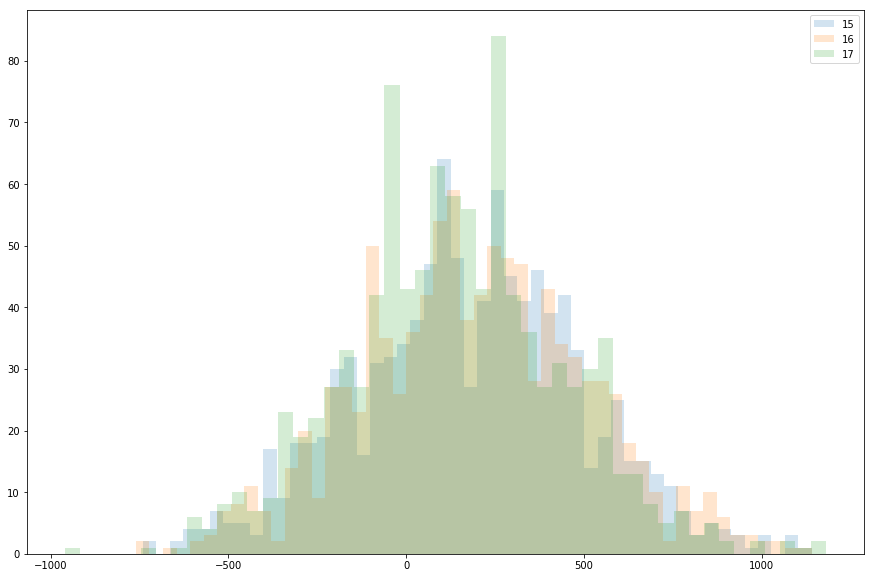

In [79]:
plt.figure(figsize=(15,10))
for i in [15,16,17]:
    plt.hist(distribute_outcomes(10, i, False), alpha=0.2,bins=50)
plt.legend(['15','16','17'])

Lets use Seaborn to make a grid to compare the outcomes:

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
results = {}

for i in [14,15,16,17, 18, 19]:
    results[i] = distribute_outcomes(10, i, False)

In [14]:
hold = []
amount = []
for i in results.keys():
    for j in results[i]:
        hold.append(i)
        amount.append(j)

In [15]:
results_frame = pd.DataFrame({'hold':hold,'amount':amount})

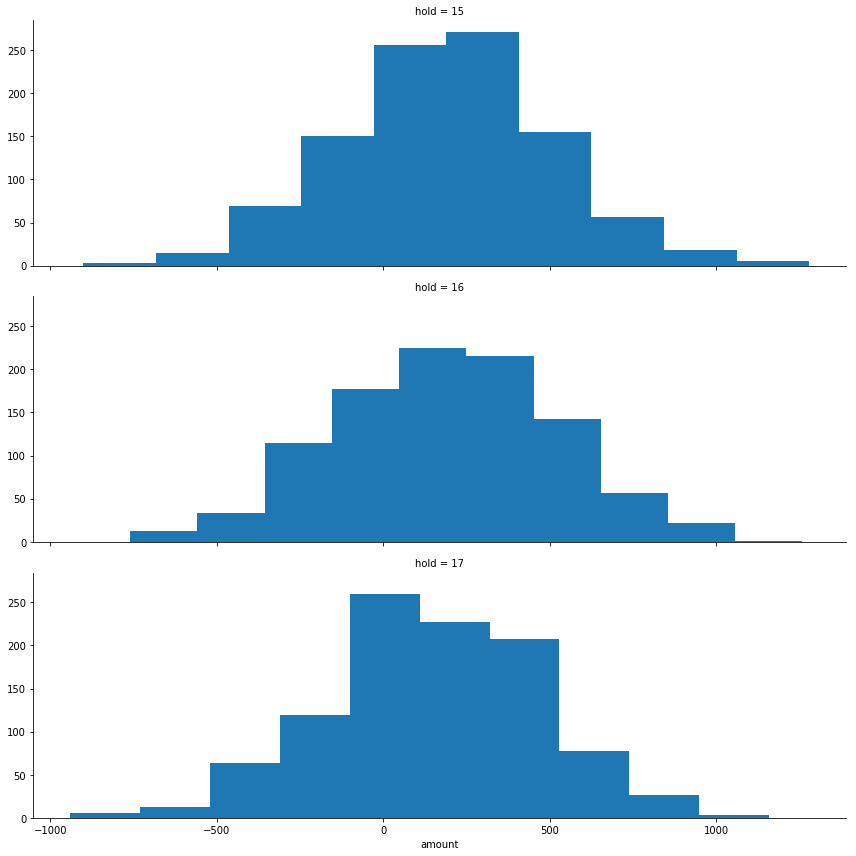

In [10]:
g = sns.FacetGrid(results_frame, row='hold',height=4, aspect=3)
g.map(plt.hist, "amount")

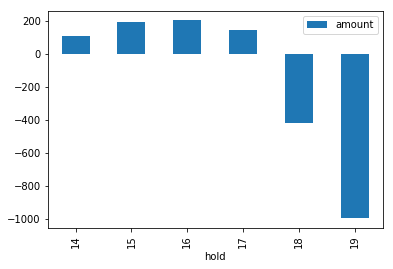

In [17]:
results_frame.groupby('hold').mean().plot.bar()

In [28]:
results_frame.groupby('hold').aggregate([np.mean,np.median,np.std])

amount                   
        mean median         std
hold                           
14    104.56    120  328.822339
15    189.72    200  322.629216
16    200.38    220  311.784325
17    145.36    140  325.076214
18   -419.02   -440  291.890115
19   -994.84  -1000   34.504564

Based on the above distributions, holding on 15 & 16 appear to have the most frequently positive outcomes, although not a signficant shift in the average outcome. 17 can have a slightly negative return overall. 

Looking also at the Standard Deviation, it shows that the outcomes are widely distributed, meaning there is still the possibility of losing money rather than winning. 